# Machine Learning with DecisionTree 

### Problem Statement 
Analyze the heart disease dataset to explore the machine learning algorithms and build decision tree model to predict the disease.

In [2]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

### Read the data

In [4]:
# read the file
heart = pd.read_csv(r"D:\new Data science class\project\3. decission tree\Heart Disease Prediction\Dataset\HeartDisease.csv")

In [5]:
# Primary data inspection 
heart.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data fields 
* age -- Age of the patient 
* gender -- Gender of the patient - (0,1) - (Male, Female) 
* chest_pain -- It refers to the chest pain experienced by the patient -(0,1,2,3) 
* rest_bps -- Blood pressure of the patient while resting(in mm/Hg) 
* cholesterol -- Patient's cholesterol level (in mg/dl) 
* fasting_blood_sugar -- The blood sugar of the patient while fasting 
* rest_ecg -- Potassium level (0,1,2) 
* thalach -- The patient’s maximum heart rate 
* exer_angina -- It refers to exercise-induced angina - (1=Yes, 0=No)
* old_peak -- It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots) 
* slope It -- refers to the slope of the peak of the exercise ST-Segment- (0,1,2) 
* ca -- Number of major vessels - (0,1,2,3,4) 
* thalassemia -- It refers to thalassemia which is a blood disorder - (0,1,2,3) 
* target -- The patient has heart disease or not - (1=Yes, 0=No)

### EDA

In [6]:
# Checking the columns in data 
heart.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [7]:
# Check the no of rows and no of columns in data 
heart.shape

(303, 14)

In [8]:
# Feature information
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* There are no nulls in the data 
* There are no string datatype 

In [9]:
# check distribution of y-variable 
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

The target variable is almost evenly distributed 

In [10]:
# check for singularities 
for c in heart.columns:
    print(heart[c].value_counts ())
    print("-----")

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64
-----
1    207
0     96
Name: gender, dtype: int64
-----
0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64
-----
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1
174     1
172     1
104     1
165     1
164     1
106     1
156     1
155     1
154     1
114     1
117     1
123    

We have observed that data is sorted by the target. Hence we need to shuffle data  before splitting to make sure that training and testing data is representative of the overall distribution of data 

In [11]:
# shuffle the data 
heart = heart.sample(frac= 1)
heart.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0


### Splitting the data 

In [12]:
# split data into train and test 
trainx,testx,trainy,testy = train_test_split(heart.drop('target',1),
                                            heart.target,
                                            test_size = 0.2)
print(trainx.shape,trainy.shape)
print(testx.shape, testy.shape)

(242, 13) (242,)
(61, 13) (61,)


### Model 1

In [16]:
# build the model 
m1 = DecisionTreeClassifier().fit(trainx,trainy)

In [17]:
# prediction 
p1 = m1.predict(testx)

#### Function to print Confusion Matrix and Classification Report 

In [18]:
# confusion matrix and classification report 

def cm(actual,predicted):
    # confusion matrix 
    df = pd.DataFrame({'actual':actual,'predicted':predicted})
    print(pd.crosstab(df.actual,df.predicted,margins= True))
    
    print("\n")
    
    # classification report 
    print(classification_report(actual,predicted))

In [19]:
# Print the Confusion Matrix and Classification Report 
cm(testy,p1)

predicted   0   1  All
actual                
0          19   8   27
1           7  27   34
All        26  35   61


              precision    recall  f1-score   support

           0       0.73      0.70      0.72        27
           1       0.77      0.79      0.78        34

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



The overall accuracy of this model is 75%.

In [20]:
# get the depth of tree
m1.get_depth()

9

### Model 2
We will build this model by fine tuning the hyper- parameters by using GridSearchCV

In [26]:
# Create a instance of model 
dtclf = DecisionTreeClassifier()

In [42]:
# building hyperparameters 
params = ({'criterion':['ginni','entropy'],
           'max_depth':np.arange(2,5),
           'min_samples_split':np.arange(2,5)
          })

In [43]:
# run the gridSearchCV
grid = GridSearchCV(dtclf, param_grid = params, scoring = 'accuracy', 
                    cv= 10, n_jobs=-1).fit(trainx,trainy)

In [44]:
# get the best params
bp = grid.best_params_
bp

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [45]:
# build model using best params from gridSearchCV
m2 = DecisionTreeClassifier( criterion = bp['criterion'],
           max_depth = bp['max_depth'],
           min_samples_split= bp['min_samples_split']).fit(trainx,trainy)

In [46]:
# prediction on test data 
p2= m2.predict(testx)

In [47]:
# confusion matrix and classification report 
cm(testy,p2)

predicted   0   1  All
actual                
0          21   6   27
1           7  27   34
All        28  33   61


              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



Using the GridSearchCV, we can see that the accuracy has increased from 75% to 79% 

[Text(418.5, 475.65000000000003, 'chest_pain <= 0.5\nentropy = 0.995\nsamples = 242\nvalue = [111, 131]'),
 Text(209.25, 339.75, 'ca <= 0.5\nentropy = 0.835\nsamples = 113\nvalue = [83, 30]'),
 Text(104.625, 203.85000000000002, 'thalassemia <= 2.5\nentropy = 0.995\nsamples = 50\nvalue = [23, 27]'),
 Text(52.3125, 67.94999999999999, 'entropy = 0.784\nsamples = 30\nvalue = [7, 23]'),
 Text(156.9375, 67.94999999999999, 'entropy = 0.722\nsamples = 20\nvalue = [16, 4]'),
 Text(313.875, 203.85000000000002, 'age <= 63.5\nentropy = 0.276\nsamples = 63\nvalue = [60, 3]'),
 Text(261.5625, 67.94999999999999, 'entropy = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(366.1875, 67.94999999999999, 'entropy = 0.722\nsamples = 15\nvalue = [12, 3]'),
 Text(627.75, 339.75, 'age <= 56.5\nentropy = 0.755\nsamples = 129\nvalue = [28, 101]'),
 Text(523.125, 203.85000000000002, 'thalach <= 153.0\nentropy = 0.428\nsamples = 80\nvalue = [7, 73]'),
 Text(470.8125, 67.94999999999999, 'entropy = 0.896\nsamples = 16\n

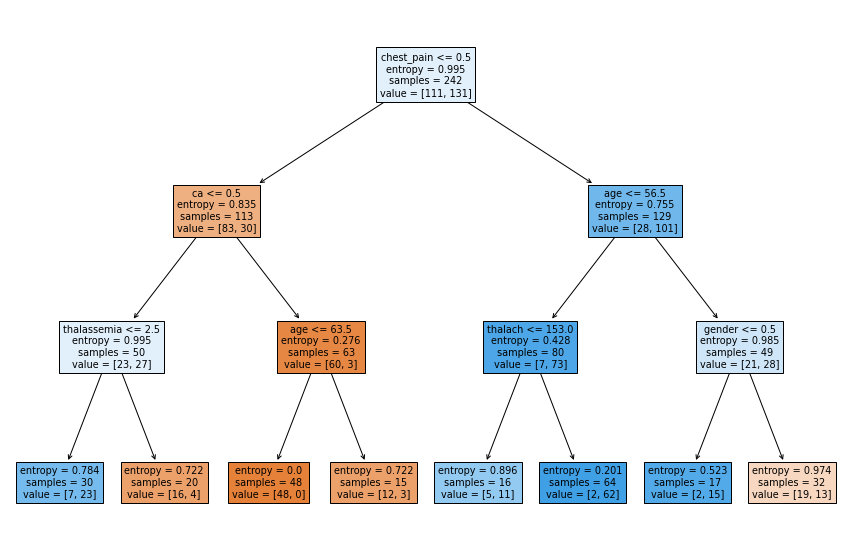

In [49]:
# draw the tree 
fig = plt.figure(figsize = (15,10))
tree.plot_tree(m2,
              feature_names = trainx.columns,
              filled = True)

### Feature selection 

In [52]:
# checking feature importance
temp = pd.DataFrame(m2.feature_importances_,trainx.columns, columns= ['importance'])
temp.sort_values('importance', ascending = False )

,importance
chest_pain,0.393471
ca,0.217788
age,0.171601
thalassemia,0.094702
gender,0.065787
thalach,0.056652
rest_bps,0.000000
cholestrol,0.000000
fasting_blood_sugar,0.000000
rest_ecg,0.000000


In [53]:
# selecting columns with importance greater than 0 and creating new model using these features
selected_cols = trainx.columns[temp['importance']>0]
selected_cols

Index(['age', 'gender', 'chest_pain', 'thalach', 'ca', 'thalassemia'], dtype='object')

### Model 3 
We will build this model by using only the selected features

In [56]:
# Defining the dependent and independent variables
X = heart[selected_cols]
Y = heart.target

In [57]:
# train test split 
trainx1,testx1,trainy1,testy1 = train_test_split(X,Y, test_size = 0.2)
print(trainx1.shape, trainy1.shape)
print(testx1.shape, testy1.shape)

(242, 6) (242,)
(61, 6) (61,)


In [77]:
# builing model 
m3 = DecisionTreeClassifier().fit(trainx1,trainy1)

In [78]:
# prediction 
p3 = m3.predict(testx1)

In [79]:
# Print the Confusion Matrix and Classification Report 
cm(testy1,p3)

predicted   0   1  All
actual                
0          21  11   32
1           7  22   29
All        28  33   61


              precision    recall  f1-score   support

           0       0.75      0.66      0.70        32
           1       0.67      0.76      0.71        29

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.70        61



We can see thst reducing the features have affected the accuracy of the model. The overall accuracy has reduced to 70% 

### Conclusion 
* Decision Tree model with grid search Cv gave the best results with overall accuracy of 79% 